In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [1]:
voltages = [660]

# No SC

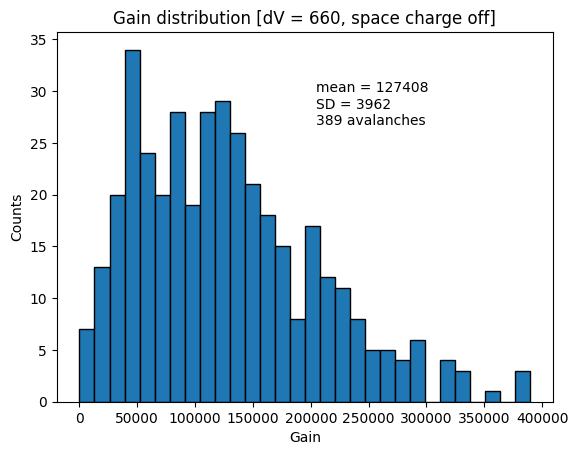

In [20]:
infile = open("size_no_sc_combined.txt")
l  = infile.readlines()
l = [i[:-1].split(",") for i in l]
gain_list_off = []

max = 0

for i in voltages:
    gain_list_voltage = []
    for entry in l:
        if entry[0] == str(i):
            gain_list_voltage.append(int(entry[1]))
            if int(entry[1]) > max:
               max = int(entry[1])
    gain_list_off.append(gain_list_voltage)



n_bins = 30
mean_gains = []
errors = []

for i in range(len(gain_list_off)):  
  #calculate mean
  total_gain = 0
  num_runs = len(gain_list_off[i])
  for gain in gain_list_off[i]:
    total_gain += gain
  mean = total_gain/num_runs

  num_runs_off = num_runs

  #calculate variance
  var = 0
  for gain in gain_list_off[i]:
    var += (gain - mean)**2
  var = var/num_runs
  se = np.sqrt(var)/np.sqrt(num_runs)

  mean_gains.append(mean)
  errors.append(se)


for i in range(len(voltages)):
  #Plot histogram
  entries_off, bc, p = plt.hist(gain_list_off[i], bins=n_bins, density=False,edgecolor='k')
  plt.xlabel("Gain")
  plt.ylabel("Counts")
  plt.title("Gain distribution [dV = "+str(voltages[i])+", space charge off]")
  plt.text(x=0.5*plt.xlim()[1],y=0.75*plt.ylim()[1],s="mean = " + str(int(round(mean,0))) + "\nSD = " + str(int(round(se,0)))+"\n" + str(num_runs) + " avalanches")
  plt.savefig("plots/no_sc_"+str(voltages[i])+".png")
  plt.show()
  plt.close()
 
  

# SC

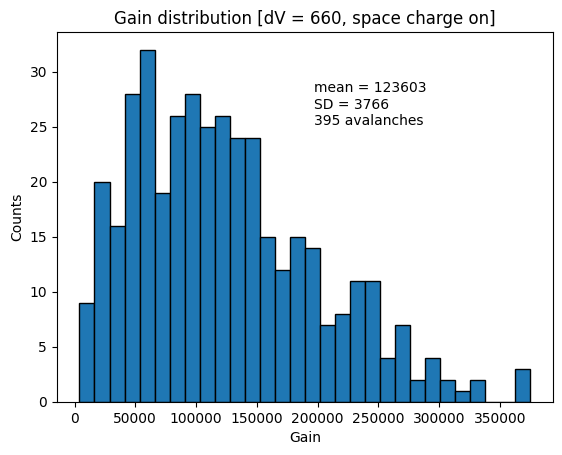

In [21]:
mean_gains = []
errors = []

infile = open("size_sc_combined.txt")
l  = infile.readlines()
l = [i[:-1].split(",") for i in l]
gain_list_on = []
max = 0
n_bins = 30

for i in voltages:
    gain_list_voltage = []
    for entry in l:
        if entry[0] == str(i):
            gain_list_voltage.append(int(entry[1]))
            if int(entry[1]) > max:
               max = int(entry[1])
    gain_list_on.append(gain_list_voltage)

for i in range(len(gain_list_on)):  
  #calculate mean
  total_gain = 0
  num_runs = len(gain_list_on[i])
  for gain in gain_list_on[i]:
    if gain > 0:
      total_gain += gain
  mean = total_gain/num_runs

  #calculate variance
  var = 0
  for gain in gain_list_on[i]:
    var += (gain - mean)**2
  var = var/num_runs
  se = np.sqrt(var)/np.sqrt(num_runs)

  mean_gains.append(mean)
  errors.append(se)


for i in range(len(voltages)):
  #Plot histogram
  entries_on, bc, p = plt.hist(gain_list_on[i], bins=n_bins, density=False,edgecolor='k')
  plt.xlabel("Gain")
  plt.ylabel("Counts")
  plt.title("Gain distribution [dV = "+str(voltages[i])+", space charge on]")
  plt.text(x=0.5*plt.xlim()[1],y=0.75*plt.ylim()[1],s="mean = " + str(int(round(mean,0))) + "\nSD = " + str(int(round(se,0)))+"\n" + str(num_runs) + " avalanches")
  plt.savefig("plots/sc_"+str(voltages[i])+".png")
  plt.show()
  plt.close()
  

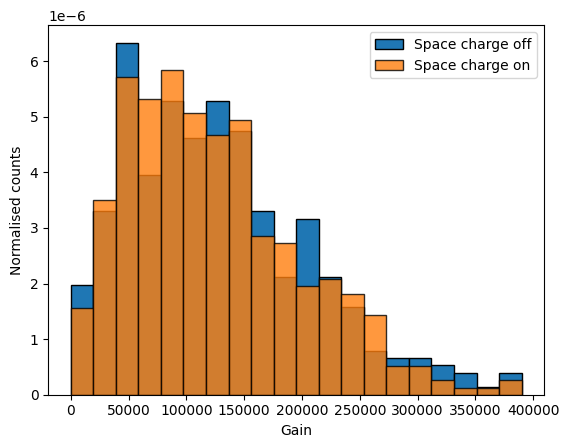

In [24]:
max = 0
for voltage in gain_list_off:
    for i in voltage:
        if i>max:
            max = i

for voltage in gain_list_on:
    for i in voltage:
        if i>max:
            max = i

#bins = np.linspace(0,max,30)
n_off = len(gain_list_off[0])
n_on = len(gain_list_on[0])

#plt.hist([gain_list_off[0],gain_list_on[0]],bins = 30,stacked=False,density=False, edgecolor = "k",label=["Space charge off","Space charge on"])

_, bins, _ = plt.hist(gain_list_off,bins=20,edgecolor = 'k',label="Space charge off",alpha=1,density=True)
plt.hist(gain_list_on,bins=bins,edgecolor = 'k',label="Space charge on",alpha=0.8,density=True)
plt.xlabel("Gain")
plt.ylabel("Normalised counts")
plt.legend()
plt.show()

